In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=26a6dddb62f77cb34486d68526c65c8d676b8cf27b7ca2f3801bf261b6bfb0cc
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import *

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
!git clone https://github.com/kundigagandeep/IPL-Auction/blob/main/ipl_2022_dataset.csv

Cloning into 'ipl_2022_dataset.csv'...
fatal: repository 'https://github.com/kundigagandeep/IPL-Auction/blob/main/ipl_2022_dataset.csv/' not found


In [10]:
df = spark.read.option("header", True).option('inferSchema', True).csv("/content/ipl_2022_dataset.csv")

In [11]:
df.show()

+---+-------------------+----------+------------+---------------+---------------+----------+--------------+
|_c0|             Player|Base Price|        TYPE|COST IN ₹ (CR.)|Cost IN $ (000)|2021 Squad|          Team|
+---+-------------------+----------+------------+---------------+---------------+----------+--------------+
|  0|        Rashid Khan|Draft Pick|      BOWLER|           15.0|         1950.0|       SRH|Gujarat Titans|
|  1|      Hardik Pandya|Draft Pick| ALL-ROUNDER|           15.0|         1950.0|        MI|Gujarat Titans|
|  2|    Lockie Ferguson|      2 Cr|      BOWLER|           10.0|         1300.0|       KKR|Gujarat Titans|
|  3|      Rahul Tewatia|   40 Lakh| ALL-ROUNDER|            9.0|         1170.0|        RR|Gujarat Titans|
|  4|       Shubman Gill|Draft Pick|      BATTER|            8.0|         1040.0|       KKR|Gujarat Titans|
|  5|     Mohammad Shami|      2 Cr|      BOWLER|           6.25|          812.5|      PBKS|Gujarat Titans|
|  6|         Yash Dayal|   

In [12]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Player: string (nullable = true)
 |-- Base Price: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- COST IN ₹ (CR.): double (nullable = true)
 |-- Cost IN $ (000): double (nullable = true)
 |-- 2021 Squad: string (nullable = true)
 |-- Team: string (nullable = true)



In [13]:
print("rows:", df.count())
print("columns:", len(df.columns))

rows: 633
columns: 8


In [14]:
df.select('Base Price').distinct().collect()

[Row(Base Price='20 Lakh'),
 Row(Base Price='2 Cr'),
 Row(Base Price='Draft Pick'),
 Row(Base Price='40 Lakh'),
 Row(Base Price='30 Lakh'),
 Row(Base Price='1 Cr'),
 Row(Base Price='50 Lakh'),
 Row(Base Price='1.5 Cr'),
 Row(Base Price='75 Lakh'),
 Row(Base Price='Retained')]

In [15]:
df.groupBy('Base Price').count().show()

+----------+-----+
|Base Price|count|
+----------+-----+
|   20 Lakh|  344|
|      2 Cr|   48|
|Draft Pick|    6|
|   40 Lakh|   16|
|   30 Lakh|    9|
|      1 Cr|   33|
|   50 Lakh|  104|
|    1.5 Cr|   20|
|   75 Lakh|   26|
|  Retained|   27|
+----------+-----+



In [16]:
df2 = df.withColumnRenamed("Player", "player")\
  .withColumnRenamed("COST IN ₹ (CR.)","Cost_inr")\
  .withColumnRenamed("Base Price","Base_Price")

In [17]:
df2.show(5)

+---+---------------+----------+-----------+--------+---------------+----------+--------------+
|_c0|         player|Base_Price|       TYPE|Cost_inr|Cost IN $ (000)|2021 Squad|          Team|
+---+---------------+----------+-----------+--------+---------------+----------+--------------+
|  0|    Rashid Khan|Draft Pick|     BOWLER|    15.0|         1950.0|       SRH|Gujarat Titans|
|  1|  Hardik Pandya|Draft Pick|ALL-ROUNDER|    15.0|         1950.0|        MI|Gujarat Titans|
|  2|Lockie Ferguson|      2 Cr|     BOWLER|    10.0|         1300.0|       KKR|Gujarat Titans|
|  3|  Rahul Tewatia|   40 Lakh|ALL-ROUNDER|     9.0|         1170.0|        RR|Gujarat Titans|
|  4|   Shubman Gill|Draft Pick|     BATTER|     8.0|         1040.0|       KKR|Gujarat Titans|
+---+---------------+----------+-----------+--------+---------------+----------+--------------+
only showing top 5 rows



In [18]:
df3 = df2.drop("Cost IN $ (000)")

In [19]:
df3.show()

+---+-------------------+----------+------------+--------+----------+--------------+
|_c0|             player|Base_Price|        TYPE|Cost_inr|2021 Squad|          Team|
+---+-------------------+----------+------------+--------+----------+--------------+
|  0|        Rashid Khan|Draft Pick|      BOWLER|    15.0|       SRH|Gujarat Titans|
|  1|      Hardik Pandya|Draft Pick| ALL-ROUNDER|    15.0|        MI|Gujarat Titans|
|  2|    Lockie Ferguson|      2 Cr|      BOWLER|    10.0|       KKR|Gujarat Titans|
|  3|      Rahul Tewatia|   40 Lakh| ALL-ROUNDER|     9.0|        RR|Gujarat Titans|
|  4|       Shubman Gill|Draft Pick|      BATTER|     8.0|       KKR|Gujarat Titans|
|  5|     Mohammad Shami|      2 Cr|      BOWLER|    6.25|      PBKS|Gujarat Titans|
|  6|         Yash Dayal|   20 Lakh|      BOWLER|     3.2|      NULL|Gujarat Titans|
|  7|       David Miller|      1 Cr|      BATTER|     3.0|        RR|Gujarat Titans|
|  8|     R. Sai Kishore|   20 Lakh|      BOWLER|     3.0|       

In [20]:
df2.select('player','Cost_inr').where(df3.TYPE == 'BATTER').orderBy('Cost_inr', ascending=False).show(3)

+---------------+--------+
|         player|Cost_inr|
+---------------+--------+
|   Rohit Sharma|    16.0|
|    Virat Kohli|    15.0|
|Kane Williamson|    14.0|
+---------------+--------+
only showing top 3 rows



In [21]:
df3.createOrReplaceTempView('ipl')

In [22]:
spark.sql("""SELECT Player, Cost_inr FROM ipl WHERE TYPE='BATTER' ORDER BY 2 DESC LIMIT 3""").show()

+---------------+--------+
|         Player|Cost_inr|
+---------------+--------+
|   Rohit Sharma|    16.0|
|    Virat Kohli|    15.0|
|Kane Williamson|    14.0|
+---------------+--------+



## name of top 5 bowlers who paid most

In [23]:
df3.select('Player','Cost_inr','Team').where(df3.TYPE =="BOWLER").orderBy('Cost_inr', ascending =False).show(5)

+---------------+--------+-------------------+
|         Player|Cost_inr|               Team|
+---------------+--------+-------------------+
|    Rashid Khan|    15.0|     Gujarat Titans|
|  Deepak Chahar|    14.0|Chennai Super Kings|
| Jasprit Bumrah|    12.0|     Mumbai Indians|
| Shardul Thakur|   10.75|     Delhi Capitals|
|Lockie Ferguson|    10.0|     Gujarat Titans|
+---------------+--------+-------------------+
only showing top 5 rows



In [24]:
spark.sql("""SELECT Player , Cost_inr , Team FROM ipl WHERE TYPE='BOWLER' ORDER BY 2 DESC LIMIT 5""").show()

+--------------+--------+--------------------+
|        Player|Cost_inr|                Team|
+--------------+--------+--------------------+
|   Rashid Khan|    15.0|      Gujarat Titans|
| Deepak Chahar|    14.0| Chennai Super Kings|
|Jasprit Bumrah|    12.0|      Mumbai Indians|
|Shardul Thakur|   10.75|      Delhi Capitals|
|    Avesh Khan|    10.0|Lucknow Super Giants|
+--------------+--------+--------------------+



## name of 5 all rounders who get paid most

In [25]:
#with pyspark
df3.select('Player','Cost_inr','Team').filter(df3.TYPE == "ALL-ROUNDER").orderBy('Cost_inr', ascending=False).show(20)

+-----------------+--------+--------------------+
|           Player|Cost_inr|                Team|
+-----------------+--------+--------------------+
|  Ravindra Jadeja|    16.0| Chennai Super Kings|
|    Hardik Pandya|    15.0|      Gujarat Titans|
|    Andre Russell|    12.0|Kolkata Knight Ri...|
| Liam Livingstone|    11.5|        Punjab Kings|
|    Glenn Maxwell|    11.0|Royal Challengers...|
|Wanindu Hasaranga|   10.75|Royal Challengers...|
|    Harshal Patel|   10.75|Royal Challengers...|
|   Marcus Stoinis|     9.2|Lucknow Super Giants|
|    Rahul Tewatia|     9.0|      Gujarat Titans|
|       Axar Patel|     9.0|      Delhi Capitals|
|    Shahrukh Khan|     9.0|        Punjab Kings|
|     Jason Holder|    8.75|Lucknow Super Giants|
|Washington Sundar|    8.75| Sunrisers Hyderabad|
|    Krunal Pandya|    8.25|Lucknow Super Giants|
|        Tim David|    8.25|      Mumbai Indians|
|        Moeen Ali|     8.0| Chennai Super Kings|
|      Nitish Rana|     8.0|Kolkata Knight Ri...|


In [26]:
#with Spark.sql
spark.sql("""SELECT Player,Cost_inr,Team FROM ipl WHERE TYPE='ALL-ROUNDER' ORDER BY 2 DESC LIMIT 5""").show()

+----------------+--------+--------------------+
|          Player|Cost_inr|                Team|
+----------------+--------+--------------------+
| Ravindra Jadeja|    16.0| Chennai Super Kings|
|   Hardik Pandya|    15.0|      Gujarat Titans|
|   Andre Russell|    12.0|Kolkata Knight Ri...|
|Liam Livingstone|    11.5|        Punjab Kings|
|   Glenn Maxwell|    11.0|Royal Challengers...|
+----------------+--------+--------------------+



# 5 lowest paid wicket-keepers

In [27]:
#with pyspark
df3.select('Player','Cost_inr','Team').filter(df3.TYPE == "WICKETKEEPER").orderBy('Cost_inr', ascending=True).show(5)

+--------------------+--------+------+
|              Player|Cost_inr|  Team|
+--------------------+--------+------+
|Mohammed Azharuddeen|    NULL|Unsold|
|  Rahmanullah Gurbaz|    NULL|Unsold|
|      Vishnu Solanki|    NULL|Unsold|
|          Litton Das|    NULL|Unsold|
|  Niroshan Dickwella|    NULL|Unsold|
+--------------------+--------+------+
only showing top 5 rows



In [28]:
#with Spaerk.sql
spark.sql("""SELECT Player, Cost_inr, Team FROM ipl WHERE TYPE='WICKETKEEPER' ORDER BY 2 ASC LIMIT 5""").show()

+--------------------+--------+------+
|              Player|Cost_inr|  Team|
+--------------------+--------+------+
|Mohammed Azharuddeen|    NULL|Unsold|
|      Andre Fletcher|    NULL|Unsold|
|      Vishnu Solanki|    NULL|Unsold|
|          Litton Das|    NULL|Unsold|
|  Niroshan Dickwella|    NULL|Unsold|
+--------------------+--------+------+



# Average amount

In [29]:
#with pyspark
df3.groupBy('Type').avg('Cost_inr').show()

+------------+------------------+
|        Type|     avg(Cost_inr)|
+------------+------------------+
|WICKETKEEPER| 5.087037037037038|
|      BOWLER| 3.069480519480519|
| ALL-ROUNDER|3.6062499999999975|
|      BATTER| 4.107777777777778|
+------------+------------------+



In [30]:
#with spark.sql
spark.sql("""SELECT type, round(avg(Cost_inr),2) average_price FROM ipl GROUP BY 1 ORDER BY 2 DESC""")

DataFrame[type: string, average_price: double]

# Retained Players

In [31]:
#with pyspark
df3.select('Player','Cost_inr','Team').where(df3.Base_Price == "Retained").show()

+-------------------+--------+--------------------+
|             Player|Cost_inr|                Team|
+-------------------+--------+--------------------+
|    Ravindra Jadeja|    16.0| Chennai Super Kings|
|           MS Dhoni|    12.0| Chennai Super Kings|
|          Moeen Ali|     8.0| Chennai Super Kings|
|    Ruturaj Gaikwad|     6.0| Chennai Super Kings|
|       Rishabh Pant|    16.0|      Delhi Capitals|
|         Axar Patel|     9.0|      Delhi Capitals|
|       Prithvi Shaw|     7.5|      Delhi Capitals|
|      Anrich Nortje|     6.5|      Delhi Capitals|
|      Andre Russell|    12.0|Kolkata Knight Ri...|
|     Venkatesh Iyer|     8.0|Kolkata Knight Ri...|
|Varun Chakaravarthy|     8.0|Kolkata Knight Ri...|
|       Sunil Narine|     6.0|Kolkata Knight Ri...|
|     Mayank Agarwal|    12.0|        Punjab Kings|
|     Arshdeep Singh|     4.0|        Punjab Kings|
|       Rohit Sharma|    16.0|      Mumbai Indians|
|     Jasprit Bumrah|    12.0|      Mumbai Indians|
|   Suryakum

In [32]:
#with spark.sql
spark.sql("""SELECT Player, Cost_inr, Team FROM ipl WHERE Base_Price="Retained" """).show()

+-------------------+--------+--------------------+
|             Player|Cost_inr|                Team|
+-------------------+--------+--------------------+
|    Ravindra Jadeja|    16.0| Chennai Super Kings|
|           MS Dhoni|    12.0| Chennai Super Kings|
|          Moeen Ali|     8.0| Chennai Super Kings|
|    Ruturaj Gaikwad|     6.0| Chennai Super Kings|
|       Rishabh Pant|    16.0|      Delhi Capitals|
|         Axar Patel|     9.0|      Delhi Capitals|
|       Prithvi Shaw|     7.5|      Delhi Capitals|
|      Anrich Nortje|     6.5|      Delhi Capitals|
|      Andre Russell|    12.0|Kolkata Knight Ri...|
|     Venkatesh Iyer|     8.0|Kolkata Knight Ri...|
|Varun Chakaravarthy|     8.0|Kolkata Knight Ri...|
|       Sunil Narine|     6.0|Kolkata Knight Ri...|
|     Mayank Agarwal|    12.0|        Punjab Kings|
|     Arshdeep Singh|     4.0|        Punjab Kings|
|       Rohit Sharma|    16.0|      Mumbai Indians|
|     Jasprit Bumrah|    12.0|      Mumbai Indians|
|   Suryakum

In [39]:
df3.select('player', 'Cost_inr', 'Team').where(df3.Cost_inr == 16.0).show()

+---------------+--------+-------------------+
|         player|Cost_inr|               Team|
+---------------+--------+-------------------+
|Ravindra Jadeja|    16.0|Chennai Super Kings|
|   Rishabh Pant|    16.0|     Delhi Capitals|
|   Rohit Sharma|    16.0|     Mumbai Indians|
+---------------+--------+-------------------+



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df4 = pd.read_csv("/content/ipl_2022_dataset.csv")

In [42]:
print(df4.head())        # Display the first few rows
print(df4.info())        # Get information about the DataFrame
print(df4.describe())    # Get summary statistics


   Unnamed: 0           Player  Base Price         TYPE  COST IN ₹ (CR.)  \
0           0      Rashid Khan  Draft Pick       BOWLER             15.0   
1           1    Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0   
2           2  Lockie Ferguson        2 Cr       BOWLER             10.0   
3           3    Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0   
4           4     Shubman Gill  Draft Pick       BATTER              8.0   

   Cost IN $ (000) 2021 Squad            Team  
0           1950.0        SRH  Gujarat Titans  
1           1950.0         MI  Gujarat Titans  
2           1300.0        KKR  Gujarat Titans  
3           1170.0         RR  Gujarat Titans  
4           1040.0        KKR  Gujarat Titans  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player  

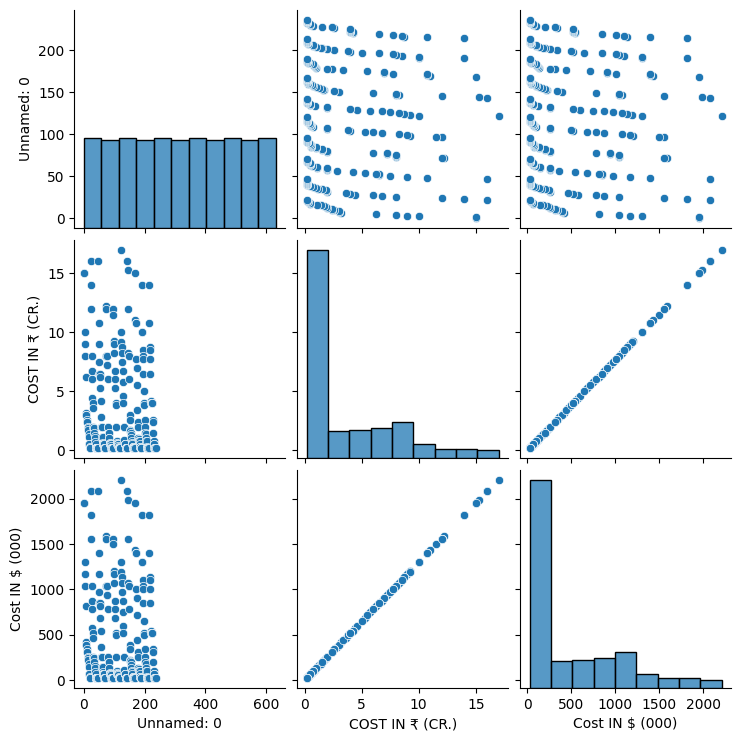

In [48]:
# Pair plot for visualizing relationships across multiple features
sns.pairplot(df4)
plt.show()


# New Section

In [51]:
high_cost_players = df4[df4['COST IN ₹ (CR.)'] > 10]
print(high_cost_players)


     Unnamed: 0             Player  Base Price          TYPE  COST IN ₹ (CR.)  \
0             0        Rashid Khan  Draft Pick        BOWLER            15.00   
1             1      Hardik Pandya  Draft Pick   ALL-ROUNDER            15.00   
22           22    Ravindra Jadeja    Retained   ALL-ROUNDER            16.00   
23           23      Deepak Chahar        2 Cr        BOWLER            14.00   
24           24           MS Dhoni    Retained  WICKETKEEPER            12.00   
47           47       Rishabh Pant    Retained  WICKETKEEPER            16.00   
48           48     Shardul Thakur        2 Cr        BOWLER            10.75   
71           71       Shreyas Iyer        2 Cr        BATTER            12.25   
72           72      Andre Russell    Retained   ALL-ROUNDER            12.00   
96           96     Mayank Agarwal    Retained        BATTER            12.00   
97           97   Liam Livingstone        1 Cr   ALL-ROUNDER            11.50   
121         121           KL

In [53]:
avg_cost_by_team = df4.groupby('Team')['COST IN ₹ (CR.)'].mean()
print(avg_cost_by_team)

Team
Chennai Super Kings            3.482000
Delhi Capitals                 3.600000
Gujarat Titans                 4.075000
Kolkata Knight Riders          3.262000
Lucknow Super Giants           4.063636
Mumbai Indians                 3.596000
Punjab Kings                   3.382000
Rajasthan Royals               3.710417
Royal Challengers Bangalore    4.020455
Sunrisers Hyderabad            3.908696
Unsold                              NaN
Name: COST IN ₹ (CR.), dtype: float64


In [54]:
player_count_by_team = df4['Team'].value_counts()
print(player_count_by_team)

Team
Unsold                         396
Chennai Super Kings             25
Kolkata Knight Riders           25
Punjab Kings                    25
Mumbai Indians                  25
Delhi Capitals                  24
Rajasthan Royals                24
Sunrisers Hyderabad             23
Gujarat Titans                  22
Lucknow Super Giants            22
Royal Challengers Bangalore     22
Name: count, dtype: int64


In [55]:
sorted_players = df4.sort_values(by='COST IN ₹ (CR.)', ascending=False)
print(sorted_players)

     Unnamed: 0                  Player  Base Price          TYPE  \
121         121                KL Rahul  Draft Pick  WICKETKEEPER   
22           22         Ravindra Jadeja    Retained   ALL-ROUNDER   
143         143            Rohit Sharma    Retained        BATTER   
47           47            Rishabh Pant    Retained  WICKETKEEPER   
144         144            Ishan Kishan        2 Cr  WICKETKEEPER   
..          ...                     ...         ...           ...   
628         628            Sairaj Patil     20 Lakh        BATTER   
629         629              Monu Singh     20 Lakh        BOWLER   
630         630  Nivethan Radhakrishnan     20 Lakh        BOWLER   
631         631            Lance Morris     20 Lakh        BOWLER   
632         632            Aaron Hardie     20 Lakh   ALL-ROUNDER   

     COST IN ₹ (CR.)  Cost IN $ (000) 2021 Squad                  Team  
121            17.00           2210.0       PBKS  Lucknow Super Giants  
22             16.00     

In [58]:
df4['Cost in Million $'] = df4['Cost IN $ (000)'] / 1000
print(df4.head())


   Unnamed: 0           Player  Base Price         TYPE  COST IN ₹ (CR.)  \
0           0      Rashid Khan  Draft Pick       BOWLER             15.0   
1           1    Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0   
2           2  Lockie Ferguson        2 Cr       BOWLER             10.0   
3           3    Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0   
4           4     Shubman Gill  Draft Pick       BATTER              8.0   

   Cost IN $ (000) 2021 Squad            Team  Cost in Million $  
0           1950.0        SRH  Gujarat Titans               1.95  
1           1950.0         MI  Gujarat Titans               1.95  
2           1300.0        KKR  Gujarat Titans               1.30  
3           1170.0         RR  Gujarat Titans               1.17  
4           1040.0        KKR  Gujarat Titans               1.04  


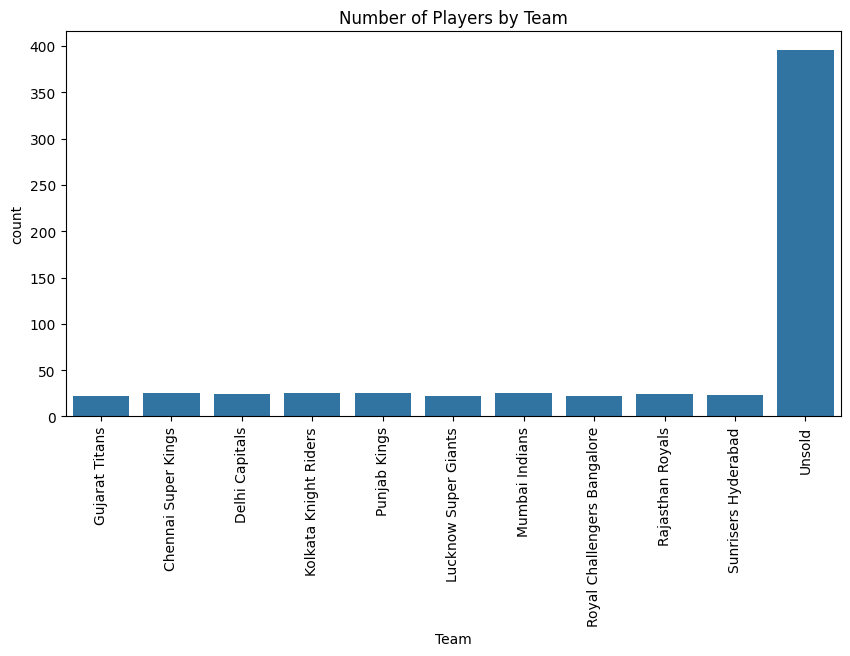

In [66]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Team', data=df4)
plt.title('Number of Players by Team')
plt.xticks(rotation=90)
plt.show()

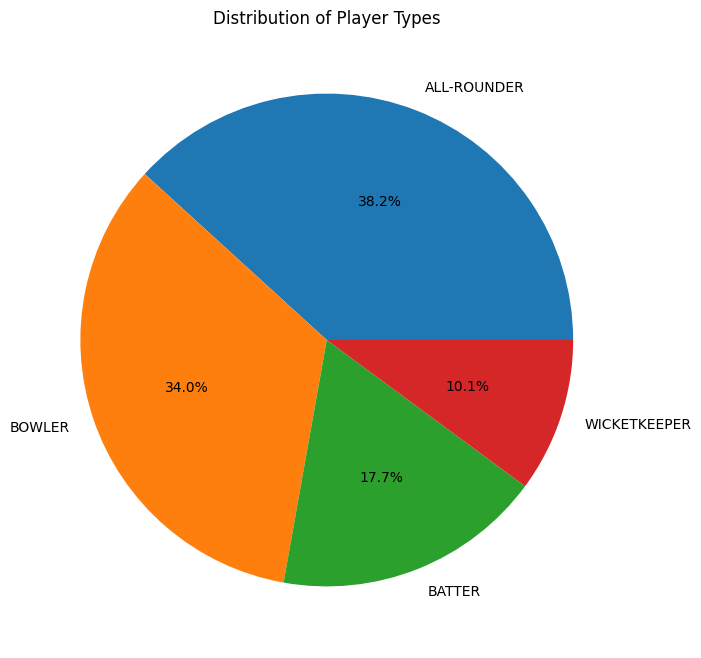

In [61]:
df4['TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Player Types')
plt.ylabel('')
plt.show()


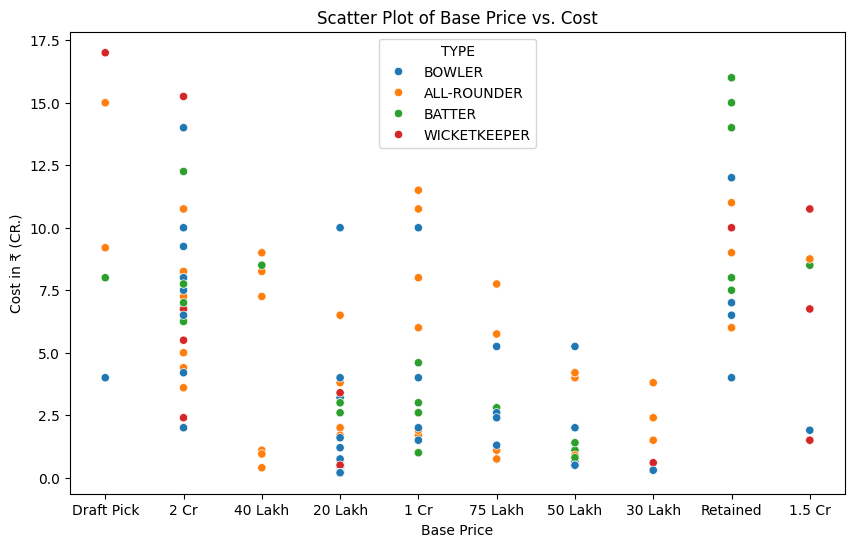

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base Price', y='COST IN ₹ (CR.)', hue='TYPE', data=df4)
plt.title('Scatter Plot of Base Price vs. Cost')
plt.xlabel('Base Price')
plt.ylabel('Cost in ₹ (CR.)')
plt.show()

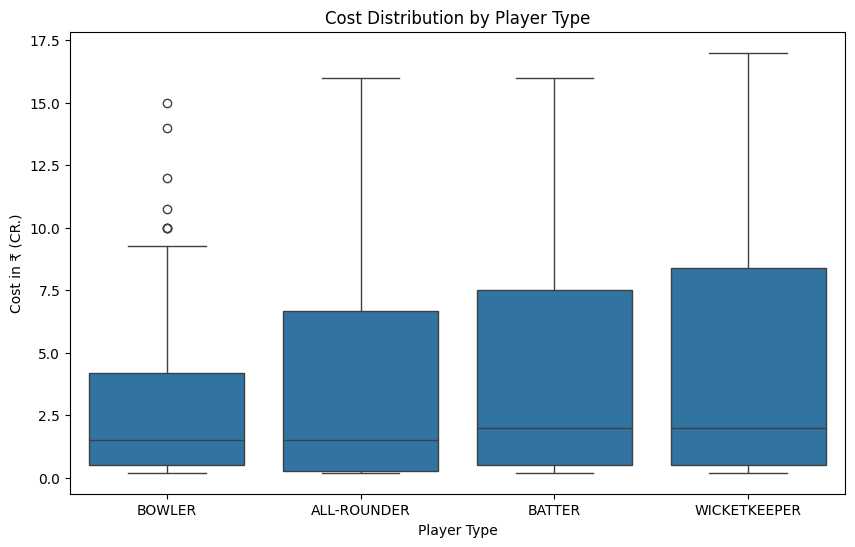

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TYPE', y='COST IN ₹ (CR.)', data=df4)
plt.title('Cost Distribution by Player Type')
plt.xlabel('Player Type')
plt.ylabel('Cost in ₹ (CR.)')
plt.show()


In [65]:
df4.to_csv('modified_data.csv', index=False)
